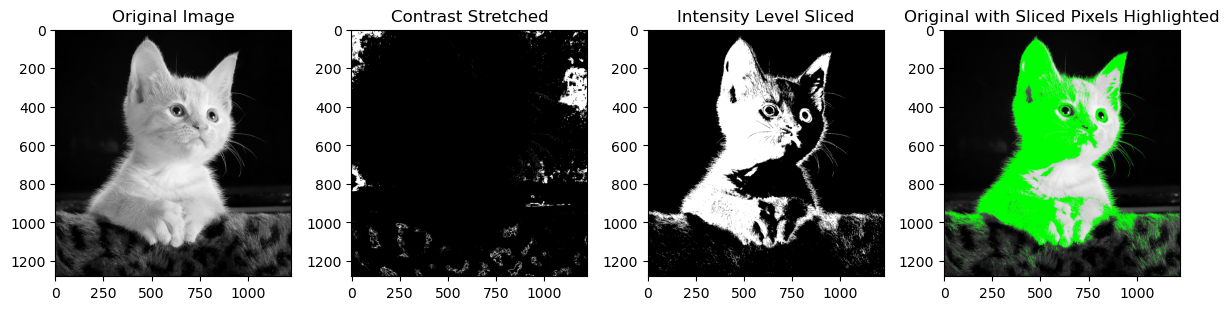

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'cat.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function for contrast stretching
def contrast_stretching(image):
    min_intensity = np.min(image)
    max_intensity = np.max(image)
    stretched_image = 255 * (image - min_intensity) / (max_intensity - min_intensity)
    return stretched_image.astype(np.uint8)

# Function for intensity level slicing
def intensity_level_slicing(image, min_intensity, max_intensity):
    sliced_image = np.copy(image)
    sliced_image[(image >= min_intensity) & (image <= max_intensity)] = 255
    sliced_image[(image < min_intensity) | (image > max_intensity)] = 0
    return sliced_image.astype(np.uint8)

# Apply contrast stretching
stretched_image = contrast_stretching(original_image)

# Apply intensity level slicing
min_intensity = 100
max_intensity = 200
sliced_image = intensity_level_slicing(original_image, min_intensity, max_intensity)

# Display the results
plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

# Contrast stretched image
plt.subplot(1, 4, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast Stretched')

# Intensity level sliced image
plt.subplot(1, 4, 3)
plt.imshow(sliced_image, cmap='gray')
plt.title('Intensity Level Sliced')

# Overlay original image and sliced image for comparison
overlay_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB)
overlay_image[(sliced_image == 255)] = [0, 255, 0]  # Highlight pixels in the specified intensity range

plt.subplot(1, 4, 4)
plt.imshow(overlay_image)
plt.title('Original with Sliced Pixels Highlighted')

plt.tight_layout()
plt.show()
